In [1]:
import pandas as pd

matches = pd.read_csv("../data/processed/matches_clean.csv", dtype={"match_id": str})
team_strength = pd.read_csv("../data/processed/team_strength.csv", dtype={"match_id": str})

print(matches.shape, team_strength.shape)


(1169, 12) (1169, 16)


In [2]:
matches["team1_win"] = (matches["winner"] == matches["team1"]).astype(int)
matches["team1_win"].fillna(0, inplace=True)


C:\Users\choud\AppData\Local\Temp\ipykernel_19340\2553749697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["team1_win"].fillna(0, inplace=True)


In [6]:
df = matches.merge(team_strength, on="match_id", how="left")

print(df.columns.tolist())

df.head()


['match_id', 'season', 'city', 'venue_x', 'team1_x', 'team2_x', 'toss_winner', 'toss_decision', 'winner', 'result_type', 'result_margin', 'player_of_match', 'team1_win', 'team1_y', 'team2_y', 'venue_y', 't1_batting_strength', 't1_bowling_strength', 't1_overall_strength', 't1_recent_runs', 't1_recent_wickets', 't1_recent_economy', 't2_batting_strength', 't2_bowling_strength', 't2_overall_strength', 't2_recent_runs', 't2_recent_wickets', 't2_recent_economy']


,match_id,season,city,venue_x,team1_x,team2_x,toss_winner,toss_decision,winner,result_type,...,t1_overall_strength,t1_recent_runs,t1_recent_wickets,t1_recent_economy,t2_batting_strength,t2_bowling_strength,t2_overall_strength,t2_recent_runs,t2_recent_wickets,t2_recent_economy
0,1082591,NaN,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,...,81.237936,14.854545,0.872727,5.211350,49.469909,18.216197,67.686106,12.000000,0.709091,7.144913
1,1082592,NaN,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,...,64.997995,12.872727,0.600000,4.474398,55.563482,26.550081,82.113564,13.872727,0.345455,5.605701
2,1082593,NaN,Rajkot,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,...,62.623890,12.927273,0.418182,5.912815,55.333629,32.499403,87.833032,8.454545,0.513636,4.730532
3,1082594,NaN,Indore,Holkar Cricket Stadium,Kings XI Punjab,Rising Pune Supergiant,Kings XI Punjab,field,Kings XI Punjab,wickets,...,78.612120,12.218182,0.554545,5.728582,49.284474,15.997136,65.281610,18.318182,0.554545,4.681617
4,1082595,NaN,Bengaluru,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,...,70.809759,11.981818,0.745455,5.823667,51.456979,24.258940,75.715919,11.236364,0.509091,4.367940


In [7]:
# Use metadata from matches (team1_x, team2_x)
df["team1"] = df["team1_x"]
df["team2"] = df["team2_x"]
df["venue"] = df["venue_x"]

# Drop duplicate columns from team_strength
df = df.drop(columns=["team1_x", "team2_x", "venue_x",
                      "team1_y", "team2_y", "venue_y"], errors="ignore")

df.head()


,match_id,season,city,toss_winner,toss_decision,winner,result_type,result_margin,player_of_match,team1_win,...,t1_recent_economy,t2_batting_strength,t2_bowling_strength,t2_overall_strength,t2_recent_runs,t2_recent_wickets,t2_recent_economy,team1,team2,venue
0,1082591,NaN,Hyderabad,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,Yuvraj Singh,1,...,5.211350,49.469909,18.216197,67.686106,12.000000,0.709091,7.144913,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal"
1,1082592,NaN,Pune,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,7.0,SPD Smith,1,...,4.474398,55.563482,26.550081,82.113564,13.872727,0.345455,5.605701,Rising Pune Supergiant,Mumbai Indians,Maharashtra Cricket Association Stadium
2,1082593,NaN,Rajkot,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,CA Lynn,0,...,5.912815,55.333629,32.499403,87.833032,8.454545,0.513636,4.730532,Gujarat Lions,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,1082594,NaN,Indore,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,GJ Maxwell,1,...,5.728582,49.284474,15.997136,65.281610,18.318182,0.554545,4.681617,Kings XI Punjab,Rising Pune Supergiant,Holkar Cricket Stadium
4,1082595,NaN,Bengaluru,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,15.0,KM Jadhav,1,...,5.823667,51.456979,24.258940,75.715919,11.236364,0.509091,4.367940,Royal Challengers Bangalore,Delhi Daredevils,M.Chinnaswamy Stadium


In [8]:
print(df.columns.tolist())


['match_id', 'season', 'city', 'toss_winner', 'toss_decision', 'winner', 'result_type', 'result_margin', 'player_of_match', 'team1_win', 't1_batting_strength', 't1_bowling_strength', 't1_overall_strength', 't1_recent_runs', 't1_recent_wickets', 't1_recent_economy', 't2_batting_strength', 't2_bowling_strength', 't2_overall_strength', 't2_recent_runs', 't2_recent_wickets', 't2_recent_economy', 'team1', 'team2', 'venue']


In [9]:
df["toss_team1"] = (df["toss_winner"] == df["team1"]).astype(int)
df["toss_field_first"] = (df["toss_decision"] == "field").astype(int)


In [10]:
df["batting_diff"] = df["t1_batting_strength"] - df["t2_batting_strength"]
df["bowling_diff"] = df["t1_bowling_strength"] - df["t2_bowling_strength"]
df["overall_diff"] = df["t1_overall_strength"] - df["t2_overall_strength"]

df["recent_runs_diff"] = df["t1_recent_runs"] - df["t2_recent_runs"]
df["recent_wickets_diff"] = df["t1_recent_wickets"] - df["t2_recent_wickets"]
df["recent_economy_diff"] = df["t2_recent_economy"] - df["t1_recent_economy"]  


In [11]:
venue_win_rate = (
    df.groupby(["venue", "team1"])["team1_win"]
    .mean()
    .reset_index()
    .rename(columns={"team1_win": "venue_team1_win_rate"})
)

df = df.merge(venue_win_rate, on=["venue", "team1"], how="left")
df["venue_team1_win_rate"].fillna(0.5, inplace=True)  # neutral if no history


C:\Users\choud\AppData\Local\Temp\ipykernel_19340\1983623677.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["venue_team1_win_rate"].fillna(0.5, inplace=True)  # neutral if no history


In [12]:
feature_cols = [
    "batting_diff", "bowling_diff", "overall_diff",
    "recent_runs_diff", "recent_wickets_diff", "recent_economy_diff",
    "toss_team1", "toss_field_first",
    "venue_team1_win_rate"
]

target = "team1_win"

final_df = df[["match_id", "team1", "team2"] + feature_cols + [target]]


In [13]:
final_df.to_csv("../data/processed/ml_training_data.csv", index=False)
print("Saved ml_training_data.csv with shape:", final_df.shape)


Saved ml_training_data.csv with shape: (1169, 13)


In [1]:
import pandas as pd
import numpy as np
import yaml, glob, os
matches = pd.read_csv("../data/processed/matches_clean.csv", dtype={"match_id": str})
career = pd.read_csv("../data/processed/player_career_stats.csv")
recent = pd.read_csv("../data/processed/player_recent_form.csv", dtype={"match_id": str})
career["player"] = career["player"].str.strip()
recent["player"] = recent["player"].str.strip()


In [6]:
home_venues = {
    "Chennai Super Kings": ["MA Chidambaram Stadium"],
    "Mumbai Indians": ["Wankhede Stadium"],
    "Royal Challengers Bangalore": ["M Chinnaswamy Stadium"],
    "Kolkata Knight Riders": ["Eden Gardens"],
    "Delhi Capitals": ["Arun Jaitley Stadium", "Feroz Shah Kotla"],
    "Sunrisers Hyderabad": ["Rajiv Gandhi International Stadium"],
    "Rajasthan Royals": ["Sawai Mansingh Stadium"],
    "Kings XI Punjab": ["Punjab Cricket Association Stadium"],
    "Punjab Kings": ["Punjab Cricket Association Stadium"],
}


In [7]:
# Create team1 win column (historical)
matches["team1_win"] = (matches["winner"] == matches["team1"]).astype(int)

# Venue + team1 historical win rate
venue_team1_winrate = (
    matches.groupby(["venue", "team1"])["team1_win"]
    .mean()
    .to_dict()
)


In [2]:
xi_data = {}

for file in glob.glob("../data/raw_yaml/*.yaml"):
    with open(file, "r", encoding="utf-8") as f:
        data = yaml.safe_load(f)

    match_id = os.path.basename(file).replace(".yaml", "")
    players = data["info"].get("players", {})
    
    xi_data[match_id] = {
        team: [p.strip() for p in plist]
        for team, plist in players.items()
    }
def get_playing_xi(match_id, team):
    return xi_data.get(str(match_id), {}).get(team, [])


In [3]:
def compute_team_features(xi, career_df, recent_df):
    if len(xi) == 0:
        return {
            "batting": 0, "bowling": 0, "overall": 0,
            "recent_runs": 0, "recent_wickets": 0, "recent_econ": 0
        }

    c = career_df[career_df["player"].isin(xi)]
    r = recent_df[recent_df["player"].isin(xi)]

    return {
        "batting": c["batting_strength"].mean(),
        "bowling": c["bowling_strength"].mean(),
        "overall": c["overall_strength"].mean(),
        "recent_runs": r["recent_runs"].mean(),
        "recent_wickets": r["recent_wickets"].mean(),
        "recent_econ": r["recent_economy"].mean(),
    }


In [8]:
rows = []

for _, row in matches.iterrows():
    match_id = row["match_id"]
    team1 = row["team1"]
    team2 = row["team2"]
    venue = row["venue"]

    xi1 = get_playing_xi(match_id, team1)
    xi2 = get_playing_xi(match_id, team2)

    if len(xi1) < 11 or len(xi2) < 11:
        continue

    t1 = compute_team_features(xi1, career, recent)
    t2 = compute_team_features(xi2, career, recent)

    # ✅ HOME ADVANTAGE
    is_home_team1 = int(venue in home_venues.get(team1, []))

    # ✅ VENUE BIAS
    venue_bias = venue_team1_winrate.get((venue, team1), 0.5)

    rows.append({
        "match_id": match_id,

        # Team 1
        "t1_batting": t1["batting"],
        "t1_bowling": t1["bowling"],
        "t1_overall": t1["overall"],
        "t1_recent_runs": t1["recent_runs"],
        "t1_recent_wickets": t1["recent_wickets"],
        "t1_recent_econ": t1["recent_econ"],

        # Team 2
        "t2_batting": t2["batting"],
        "t2_bowling": t2["bowling"],
        "t2_overall": t2["overall"],
        "t2_recent_runs": t2["recent_runs"],
        "t2_recent_wickets": t2["recent_wickets"],
        "t2_recent_econ": t2["recent_econ"],

        # Match context
        "toss_team1": int(row["toss_winner"] == team1),
        "toss_field": int(row["toss_decision"] == "field"),

        # ✅ NEW FEATURES
        "is_home_team1": is_home_team1,
        "venue_team1_win_rate": venue_bias,

        # Target
        "team1_win": int(row["winner"] == team1)
    })


In [10]:
df_ml = pd.DataFrame(rows)

print("Final dataset shape:", df_ml.shape)
df_ml.head(20)


Final dataset shape: (1169, 18)


,match_id,t1_batting,t1_bowling,t1_overall,t1_recent_runs,t1_recent_wickets,t1_recent_econ,t2_batting,t2_bowling,t2_overall,t2_recent_runs,t2_recent_wickets,t2_recent_econ,toss_team1,toss_field,is_home_team1,venue_team1_win_rate,team1_win
0,1082591,54.761571,26.476365,81.237936,17.227875,0.505987,4.831007,49.469909,18.216197,67.686106,17.200121,0.551172,5.512676,0,1,0,0.633333,1
1,1082592,48.697381,16.300614,64.997995,16.899940,0.370945,3.191095,55.563482,26.550081,82.113564,19.088803,0.406516,4.594933,1,1,0,0.714286,1
2,1082593,48.696867,13.927022,62.623890,17.942980,0.337492,4.313839,55.333629,32.499403,87.833032,16.655342,0.501057,4.143213,0,1,0,0.300000,0
3,1082594,51.822113,26.790007,78.612120,13.428228,0.580696,5.842549,49.284474,15.997136,65.281610,17.193381,0.360018,3.202962,1,1,0,0.400000,1
4,1082595,50.909367,19.900393,70.809759,15.912391,0.580847,5.605562,51.456979,24.258940,75.715919,13.745694,0.612739,4.296886,1,0,0,0.500000,1
5,1082596,54.761571,26.476365,81.237936,17.227875,0.505987,4.831007,43.457076,10.999391,54.456468,19.206677,0.289388,4.041007,1,1,0,0.633333,1
6,1082597,56.020054,39.649013,95.669067,16.280599,0.582160,5.469132,52.660476,24.417586,77.078061,18.253816,0.433106,3.662827,1,1,1,0.606557,1
7,1082598,50.803729,28.555355,79.359084,13.003369,0.597685,5.951547,51.151992,19.276123,70.428115,15.598039,0.539504,4.618496,0,0,0,0.400000,1
8,1082599,49.300963,16.220528,65.521490,18.340844,0.349128,2.811936,50.786251,24.122999,74.909250,13.938055,0.598740,4.408673,1,1,0,0.714286,0
9,1082600,56.020054,39.649013,95.669067,16.280599,0.582160,5.469132,51.576499,27.286059,78.862557,16.743739,0.505517,4.848325,1,1,1,0.606557,1


In [11]:
df_ml.to_csv("../data/processed/ml_training_data.csv", index=False)


In [12]:
df_ml[["is_home_team1", "venue_team1_win_rate"]].describe()


,is_home_team1,venue_team1_win_rate
count,1169.000000,1169.000000
mean,0.204448,0.497006
std,0.403470,0.245504
min,0.000000,0.000000
25%,0.000000,0.375000
50%,0.000000,0.500000
75%,0.000000,0.633333
max,1.000000,1.000000


In [13]:
df = pd.read_csv("../data/processed/ml_training_data.csv")

print("Shape:", df.shape)
df.head()


Shape: (1169, 18)


,match_id,t1_batting,t1_bowling,t1_overall,t1_recent_runs,t1_recent_wickets,t1_recent_econ,t2_batting,t2_bowling,t2_overall,t2_recent_runs,t2_recent_wickets,t2_recent_econ,toss_team1,toss_field,is_home_team1,venue_team1_win_rate,team1_win
0,1082591,54.761571,26.476365,81.237936,17.227875,0.505987,4.831007,49.469909,18.216197,67.686106,17.200121,0.551172,5.512676,0,1,0,0.633333,1
1,1082592,48.697381,16.300614,64.997995,16.899940,0.370945,3.191095,55.563482,26.550081,82.113564,19.088803,0.406516,4.594933,1,1,0,0.714286,1
2,1082593,48.696867,13.927022,62.623890,17.942980,0.337492,4.313839,55.333629,32.499403,87.833032,16.655342,0.501057,4.143213,0,1,0,0.300000,0
3,1082594,51.822113,26.790007,78.612120,13.428228,0.580696,5.842549,49.284474,15.997136,65.281610,17.193381,0.360018,3.202962,1,1,0,0.400000,1
4,1082595,50.909367,19.900393,70.809759,15.912391,0.580847,5.605562,51.456979,24.258940,75.715919,13.745694,0.612739,4.296886,1,0,0,0.500000,1


In [14]:
df.isnull().sum()


match_id                0
t1_batting              0
t1_bowling              0
t1_overall              0
t1_recent_runs          0
t1_recent_wickets       0
t1_recent_econ          0
t2_batting              0
t2_bowling              0
t2_overall              0
t2_recent_runs          0
t2_recent_wickets       0
t2_recent_econ          0
toss_team1              0
toss_field              0
is_home_team1           0
venue_team1_win_rate    0
team1_win               0
dtype: int64

In [15]:
df["team1_win"].value_counts(normalize=True)


team1_win
0    0.502994
1    0.497006
Name: proportion, dtype: float64

In [16]:
leakage_cols = [
    "winner", "result_margin", "player_of_match",
    "final_score", "runs_scored", "wickets_lost"
]

[c for c in leakage_cols if c in df.columns]


[]

In [17]:
df.describe()


,match_id,t1_batting,t1_bowling,t1_overall,t1_recent_runs,t1_recent_wickets,t1_recent_econ,t2_batting,t2_bowling,t2_overall,t2_recent_runs,t2_recent_wickets,t2_recent_econ,toss_team1,toss_field,is_home_team1,venue_team1_win_rate,team1_win
count,1.169000e+03,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000
mean,9.408352e+05,50.301838,20.932431,71.234269,16.889473,0.484003,4.648007,50.437564,20.994216,71.431781,16.704903,0.492259,4.705671,0.375535,0.653550,0.204448,0.497006,0.497006
std,3.819244e+05,3.902927,7.682501,10.476887,2.479036,0.105596,0.835036,3.994951,7.814861,10.553518,2.515622,0.110733,0.857313,0.484468,0.476042,0.403470,0.245504,0.500205
min,3.359820e+05,37.110691,2.646814,44.517022,8.945879,0.100793,1.645481,38.180896,2.725499,44.315520,9.577508,0.132573,2.013093,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483520e+05,47.946085,15.460641,64.186322,15.381174,0.407536,4.107361,47.804503,15.527559,64.497098,15.109146,0.420611,4.157074,0.000000,0.000000,0.000000,0.375000,0.000000
50%,1.082598e+06,50.459538,20.070193,70.500055,17.024125,0.488592,4.622684,50.765827,20.314363,70.525610,16.736955,0.492484,4.675689,0.000000,1.000000,0.000000,0.500000,0.000000
75%,1.304047e+06,52.819085,26.152902,77.523396,18.365013,0.555953,5.166408,53.155990,26.072796,77.600887,18.153739,0.563741,5.214432,1.000000,1.000000,0.000000,0.633333,1.000000
max,1.485779e+06,62.237811,45.563648,104.575984,24.846922,0.838350,7.666271,64.655421,42.768042,101.427569,27.841924,0.839161,7.666271,1.000000,1.000000,1.000000,1.000000,1.000000


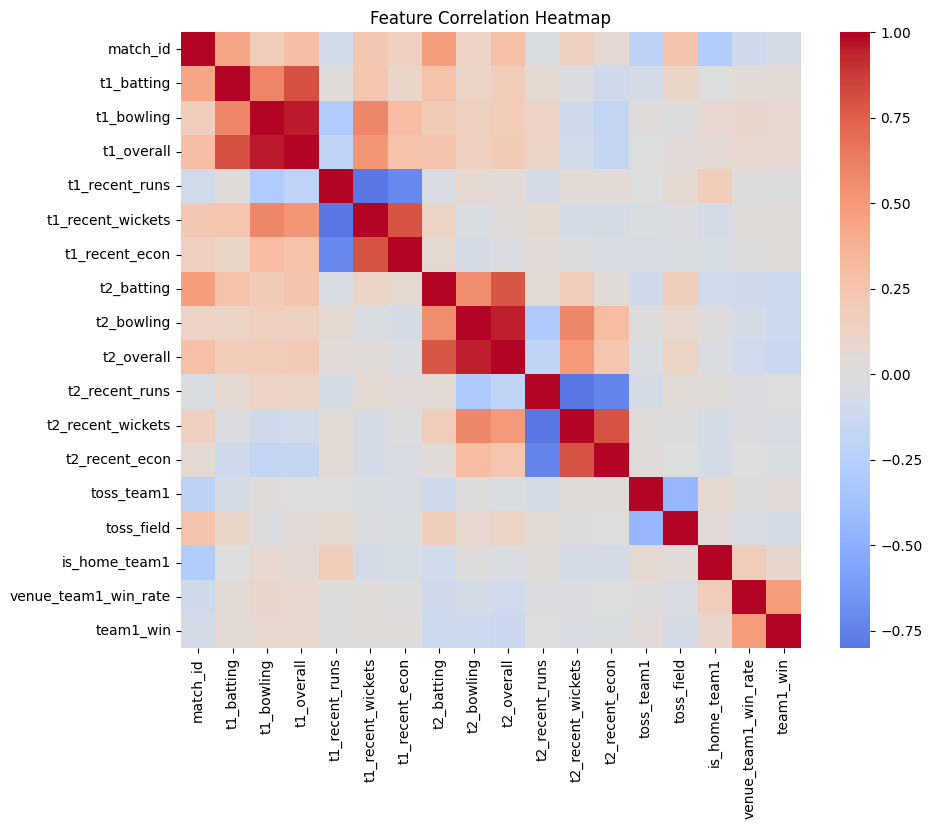

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [19]:
drop_cols = [
    "match_id",
    "t1_overall",
    "t2_overall"
]

target = "team1_win"

X = df.drop(columns=drop_cols + [target])
y = df[target].astype(int)

print("Final features:", X.columns.tolist())
print("Shape:", X.shape)


Final features: ['t1_batting', 't1_bowling', 't1_recent_runs', 't1_recent_wickets', 't1_recent_econ', 't2_batting', 't2_bowling', 't2_recent_runs', 't2_recent_wickets', 't2_recent_econ', 'toss_team1', 'toss_field', 'is_home_team1', 'venue_team1_win_rate']
Shape: (1169, 14)


In [21]:
import pandas as pd

# Load existing ML dataset
df = pd.read_csv("../data/processed/ml_training_data.csv")

# Columns to drop
drop_cols = ["match_id", "t1_overall", "t2_overall"]

# Drop columns (ignore errors just in case)
df_clean = df.drop(columns=drop_cols, errors="ignore")

# Save cleaned dataset
df_clean.to_csv("../data/processed/ml_training_data_clean.csv", index=False)

print("Saved cleaned dataset with columns:")
print(df_clean.columns.tolist())


Saved cleaned dataset with columns:
['t1_batting', 't1_bowling', 't1_recent_runs', 't1_recent_wickets', 't1_recent_econ', 't2_batting', 't2_bowling', 't2_recent_runs', 't2_recent_wickets', 't2_recent_econ', 'toss_team1', 'toss_field', 'is_home_team1', 'venue_team1_win_rate', 'team1_win']


In [22]:
df.sample(5)


,match_id,t1_batting,t1_bowling,t1_overall,t1_recent_runs,t1_recent_wickets,t1_recent_econ,t2_batting,t2_bowling,t2_overall,t2_recent_runs,t2_recent_wickets,t2_recent_econ,toss_team1,toss_field,is_home_team1,venue_team1_win_rate,team1_win
936,598020,47.889285,18.336193,66.225478,16.127128,0.503806,4.679630,58.403496,42.527638,100.931135,15.567635,0.615424,5.386217,0,0,0,0.410714,0
650,392181,50.733073,12.645780,63.378853,18.128291,0.327385,3.533060,50.982855,31.130659,82.113514,15.134067,0.723190,5.755513,1,1,0,0.000000,0
676,392209,47.657790,14.059432,61.717222,18.271503,0.374374,3.939210,40.847620,12.278319,53.125940,17.932403,0.388854,4.788183,1,0,0,1.000000,1
101,1136603,57.392216,38.977351,96.369568,16.777289,0.570087,5.288391,51.977316,11.349270,63.326586,19.728131,0.345478,3.653095,1,0,0,0.000000,0
505,1426297,46.874226,22.791750,69.665976,12.715292,0.649395,5.023591,54.331881,16.332258,70.664139,18.404841,0.391727,4.253628,0,1,0,0.600000,1


Dataset using differnces

In [11]:
import pandas as pd
import numpy as np

matches = pd.read_csv("../data/processed/matches_clean.csv", dtype={"match_id": str})
team_strength = pd.read_csv("../data/processed/team_strength.csv", dtype={"match_id": str})
recent = pd.read_csv("../data/processed/player_recent_form.csv", dtype={"match_id": str})

print(matches.shape, team_strength.shape, recent.shape)


(1169, 12) (1169, 16) (25018, 18)


In [13]:
df = matches.merge(
    team_strength,
    on=["match_id", "team1", "team2", "venue"],
    how="inner"
)

df.head()


,match_id,season,city,venue,team1,team2,toss_winner,toss_decision,winner,result_type,...,t1_overall_strength,t1_recent_runs,t1_recent_wickets,t1_recent_economy,t2_batting_strength,t2_bowling_strength,t2_overall_strength,t2_recent_runs,t2_recent_wickets,t2_recent_economy
0,1082591,NaN,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,...,81.237936,14.854545,0.872727,5.211350,49.469909,18.216197,67.686106,12.000000,0.709091,7.144913
1,1082592,NaN,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,...,64.997995,12.872727,0.600000,4.474398,55.563482,26.550081,82.113564,13.872727,0.345455,5.605701
2,1082593,NaN,Rajkot,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,...,62.623890,12.927273,0.418182,5.912815,55.333629,32.499403,87.833032,8.454545,0.513636,4.730532
3,1082594,NaN,Indore,Holkar Cricket Stadium,Kings XI Punjab,Rising Pune Supergiant,Kings XI Punjab,field,Kings XI Punjab,wickets,...,78.612120,12.218182,0.554545,5.728582,49.284474,15.997136,65.281610,18.318182,0.554545,4.681617
4,1082595,NaN,Bengaluru,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,...,70.809759,11.981818,0.745455,5.823667,51.456979,24.258940,75.715919,11.236364,0.509091,4.367940


In [7]:
keep_cols = [
    "match_id",
    "team1",
    "team2",
    "venue"
]


In [14]:
df["batting_diff"] = df["t1_batting_strength"] - df["t2_batting_strength"]
df["bowling_diff"] = df["t1_bowling_strength"] - df["t2_bowling_strength"]
df["overall_diff"] = df["t1_overall_strength"] - df["t2_overall_strength"]

df["recent_runs_diff"] = df["t1_recent_runs"] - df["t2_recent_runs"]
df["recent_wickets_diff"] = df["t1_recent_wickets"] - df["t2_recent_wickets"]
df["recent_econ_diff"] = df["t1_recent_economy"] - df["t2_recent_economy"]


In [15]:
df["toss_adv"] = np.where(
    df["toss_winner"] == df["team1"], 1,
    np.where(df["toss_winner"] == df["team2"], -1, 0)
)


In [16]:
team_city = {
    "Chennai Super Kings": "chennai",
    "Mumbai Indians": "mumbai",
    "Royal Challengers Bangalore": "bangalore",
    "Kolkata Knight Riders": "kolkata",
    "Delhi Capitals": "delhi",
    "Rajasthan Royals": "jaipur",
    "Sunrisers Hyderabad": "hyderabad",
    "Punjab Kings": "chandigarh"
}

def home_adv(row):
    venue = str(row["venue"]).lower()
    t1 = team_city.get(row["team1"], "")
    t2 = team_city.get(row["team2"], "")
    if t1 and t1 in venue:
        return 1
    if t2 and t2 in venue:
        return -1
    return 0

df["home_adv"] = df.apply(home_adv, axis=1)


In [17]:
venue_stats = (
    matches.groupby(["venue", "winner"])
    .size()
    .unstack(fill_value=0)
)

venue_wr = venue_stats.div(venue_stats.sum(axis=1), axis=0)

def venue_wr_diff(row):
    v = row["venue"]
    if v not in venue_wr.index:
        return 0
    return (
        venue_wr.loc[v].get(row["team1"], 0) -
        venue_wr.loc[v].get(row["team2"], 0)
    )

df["venue_win_rate_diff"] = df.apply(venue_wr_diff, axis=1)


In [20]:
df["team1_win"] = (df["winner"] == df["team1"]).astype(int)


In [21]:
final_cols = [
    "batting_diff",
    "bowling_diff",
    "overall_diff",
    "recent_runs_diff",
    "recent_wickets_diff",
    "recent_econ_diff",
    "toss_adv",
    "home_adv",
    "venue_win_rate_diff",
    "team1_win"
]

ml_df = df[final_cols]
ml_df.to_csv("../data/processed/ml_training_data_v2.csv", index=False)

ml_df.describe()


,batting_diff,bowling_diff,overall_diff,recent_runs_diff,recent_wickets_diff,recent_econ_diff,toss_adv,home_adv,venue_win_rate_diff,team1_win
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000
mean,-0.139161,-0.061763,-0.200924,0.293189,-0.002120,-0.008917,-0.248931,-0.007699,0.188901,0.497006
std,4.789624,10.090605,13.237981,2.759504,0.167159,1.274648,0.968936,0.334811,0.328117,0.500205
min,-15.611341,-28.245136,-40.608429,-12.909091,-0.636364,-5.390789,-1.000000,-1.000000,-0.800000,0.000000
25%,-3.323205,-7.083020,-8.914588,-1.445455,-0.118182,-0.798866,-1.000000,0.000000,-0.020833,0.000000
50%,-0.068180,0.014419,-0.165707,0.216667,-0.004545,0.001879,-1.000000,0.000000,0.222222,0.000000
75%,2.981970,6.657091,8.702131,2.012500,0.109091,0.763444,1.000000,0.000000,0.444444,1.000000
max,13.320170,29.086151,35.815039,12.700000,0.636364,5.376165,1.000000,1.000000,1.000000,1.000000


In [19]:
print(df.columns.tolist())


['match_id', 'season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result_type', 'result_margin', 'player_of_match', 't1_batting_strength', 't1_bowling_strength', 't1_overall_strength', 't1_recent_runs', 't1_recent_wickets', 't1_recent_economy', 't2_batting_strength', 't2_bowling_strength', 't2_overall_strength', 't2_recent_runs', 't2_recent_wickets', 't2_recent_economy', 'batting_diff', 'bowling_diff', 'overall_diff', 'recent_runs_diff', 'recent_wickets_diff', 'recent_econ_diff', 'toss_adv', 'home_adv', 'venue_win_rate_diff']
